<a href="https://colab.research.google.com/github/michni00/Image-Classification/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


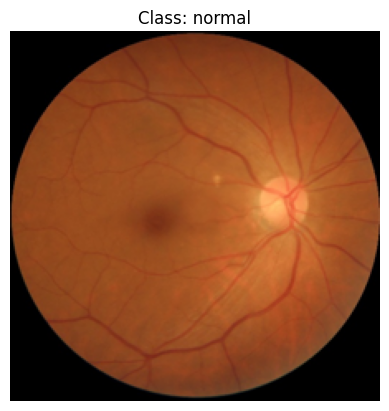

In [ ]:
data_folder = "/content/drive/MyDrive/Datasets/Eye Diseases"

class_names = os.listdir(data_folder)

data = []
labels = []

for class_name in class_names:
    class_folder = os.path.join(data_folder, class_name)
    for filename in os.listdir(class_folder):
        img_path = os.path.join(class_folder, filename)
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img_array = np.array(img)
        data.append(img_array)
        labels.append(class_name)

data, labels = shuffle(data, labels, random_state=42)
le = preprocessing.LabelEncoder()
labels_encoded = le.fit_transform(labels)

train_data, test_data, train_labels, test_labels = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
original_label = le.inverse_transform([train_labels[0]])[0]
plt.imshow(train_data[0])
plt.title(f"Class: {original_label}")
plt.axis('off');